<a href="https://colab.research.google.com/github/ssuzana/Data-Structures-and-Algorithms-Notebooks/blob/main/10_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Terminology

* A graph is a data structure used for analyzing relationships between pairs of objects.  

* A graph consists of a set *V* of *vertices* and a set $E\subset V\times V$ of *edges*. Vertices that are connected by an edge are called *adjacent*.

* Edges can be *undirected* (like a two-way street) or *directed* (like a one-way street). For a directed edge $e=(u,v)$, the vertex $u$ is its *source*, and $v$ is its *sink*.

* A *path* is a sequence of vertices. The sequence may consist of a single vertex. The *length of a path* is the number of edges it traverses. A graph is *connected* if there is a path between every pair of vertices.

* A *cycle* is a path that starts and ends at the same vertex.
An *acyclic graph* is one without cycles.

* A *tree* is a type of graph, but not all graphs are trees. A tree is a connected graph without cycles.

* There are two common ways to implement a graph: using an *adjacency list* or an *adjacency matrix*. 
  * In the adjacency list representation every vertex stores a list of adjacent vertices. Note that a directed edge $e=(u,v)$ would be stored twice: once in $u$'s adjacent vertices and once in $v$'s adjacent vertices.
  * An adjacency matrix $A=(a_{i,j})$ for a graph is a square $|V|\times |V|$ matrix in which the entry in row $i$ and column $j$ is 1 if there is an edge from vertex $i$ to vertex $j$, and 0 otherwise. This can be expressed as:
 $$a_{i,j} = 
\begin{cases}
1 & \text{if there is an edge from vertex } i \text{ to vertex } j \\
0 & \text{otherwise}
\end{cases}$$
      Note that the matrix is symmetric for undirected graphs.
      For an undirected graph, the matrix is not necessarily symmetric.







# Object-oriented Graph Implementation

In [7]:
class Vertex:
  def __init__(self, val = 0, neighbors = None):
    self.val = val
    self.neighbors = neighbors if neighbors is not None else []

  def add_adjacent_vertex(self, vertex):
    self.neighbors.append(vertex)  

Here’s how we can use this class to build a directed graph representing who follows whom in this image:

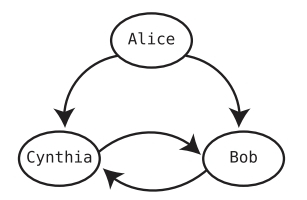

In [8]:
alice = Vertex("alice")
bob = Vertex("bob")
cynthia = Vertex("cynthia")

alice.add_adjacent_vertex(bob)
alice.add_adjacent_vertex(cynthia)
bob.add_adjacent_vertex(cynthia)
cynthia.add_adjacent_vertex(bob)

To build an undirected graph for the social network (where all friendships are mutual), we can modify our `add_adjacent_vertex` method as follows:

In [12]:
# vertex in undirected graph
class Vertex:
  def __init__(self, val = 0, neighbors = None):
    self.val = val
    self.neighbors = neighbors if neighbors is not None else []

  def add_adjacent_vertex(self, vertex):
    if vertex in self.neighbors:
      return
    else:  
      self.neighbors.append(vertex)  
      vertex.add_adjacent_vertex(self)

#**Graph Search**

* Searching a graph means getting from one vertex to another. When the graph is connected, search can be used to find any vertex within the entire graph even if we have access to just one random vertex. Graph search can be used to either find a particular vertex, or it can be used to simply traverse the graph. 

* There are two well-known approaches for graph search: *depth-first search* (DFS) and *breadth-first search* (BFS).

* If the graph could have cycles, the key to any graph search algorithm is **keeping track of which vertices we've visited so far**. If we don't do this, we can end up in an infinite cycle. One way to keep track of our visited vertices is by using a hash table. As we visit each vertex, we add the vertex (or its value) as a key in the hash table and assign it an arbitrary value, such as the boolean `True`. If a vertex is in the hash table, it means we've already visited it.

## **Depth-First Search**

1. Start at any random vertex within the graph.
2. Add the curent vertex to the hash table to mark it as having been visited.
3. Iterate through the curent vertex's adjacent vertices.
4. For each vertex, if the adjacent vertex has already been visited, ignore it.
5. If the adjacent vertex has not yet been visited, recursively perform depth-first search on that vertex.

In [97]:
# depth-first traversal (recursive) - can be used for cyclic graphs 
def dfs_traverse(vertex, visited_vertices = {}):
  visited_vertices[vertex.val] = True
  print(vertex.val)
  for adjacent_vertex in vertex.neighbors:
    if adjacent_vertex.val in visited_vertices:
      continue
    dfs_traverse(adjacent_vertex, visited_vertices)  

In [98]:
# set up the undirected graph
#            Alice
#   /       /       \        \
# Bob   Candy       Derek -- Elaine
#  |      /            |
# Fred   /           Gina
#  |    /              |
# Helen              Irena

alice = Vertex("Alice")
bob = Vertex("Bob")
candy = Vertex("Candy")
derek = Vertex("Derek")
elaine = Vertex("Elaine")
fred = Vertex("Fred")
helen = Vertex("Helen")
gina = Vertex("Gina")
irena = Vertex("Irena")
alice.add_adjacent_vertex(bob)
alice.add_adjacent_vertex(candy)
alice.add_adjacent_vertex(derek)
alice.add_adjacent_vertex(elaine)
bob.add_adjacent_vertex(fred)
candy.add_adjacent_vertex(helen)
fred.add_adjacent_vertex(helen)
derek.add_adjacent_vertex(elaine)
derek.add_adjacent_vertex(gina)
gina.add_adjacent_vertex(irena)

In [99]:
dfs_traverse(alice)
# Output: Alice, Bob, Fred, Helen, Candy, Derek, Elaine, Gina, Irena

Alice
Bob
Fred
Helen
Candy
Derek
Elaine
Gina
Irena


## **Breadth-First Search**

Algorithm for breadth-first traversal:

1. Start at any vertex. We'll call this `starting_vertex`.
2. Add `starting_vertex` to the hash table to mark it as having been visited.
3. Add `starting_vertex` to the queue.
4. Start a loop that runs while the queue isn't empty.
5. Within this loop, remove the first vertex from the queue. We'll call this `current_vertex`.
6. Iterate over all the adjacent vertices of `current_vertex`.
7. If the adjacent vertex was already visited, ignore it.
8. If the adjacent vertex has not yet been visited, mark it as visited by adding it to the hash table, and add it to the queue.
9. Repeat this loop (starting from Step 4) until the queue is empty.

### **Implementation of queue using collections.deque**

Queue in Python can be implemented using `deque` class from the `collections` module. Deque is preferred over list in the cases where we need quicker append and pop operations from both the ends of container, as `deque` provides an `O(1)` time complexity for append and pop operations as compared to list which provides `O(n)` time complexity. 

Some of the methods supported by `deque` objects:

* `append(x)` Add `x` to the right side of the deque.

* `appendleft(x)` Add `x` to the left side of the deque.

* `pop()` Remove and return an element from the right side of the deque. If no elements are present, raises an `IndexError`.

* `popleft()` Remove and return an element from the left side of the deque. If no elements are present, raises an `IndexError`.

In [100]:
# breadth-first traversal
from collections import deque

def bfs_traverse(starting_vertex):
  q = deque()
  visited_vertices = {}
  visited_vertices[starting_vertex.val] = True
  q.append(starting_vertex)

  while q:
    current_vertex = q.popleft()
    print(current_vertex.val)
    for adjacent_vertex in current_vertex.neighbors:
      if adjacent_vertex.val not in visited_vertices:
        visited_vertices[adjacent_vertex.val] = True
        q.append(adjacent_vertex)   

In [101]:
bfs_traverse(alice)
# Output: Alice, Bob, Candy, Derek, Elaine, Fred, Helen, Gina, Irena

Alice
Bob
Candy
Derek
Elaine
Fred
Helen
Gina
Irena


# Graph representation as a hashmap (adjacency list)

In [64]:
# store vertices using a hashmap
graph = dict()
for vertex in [alice, bob, candy, derek, elaine, fred, helen, gina, irena]:
  graph[vertex.val] = [v.val for v in vertex.neighbors]
print(graph)  

{'Alice': ['Bob', 'Candy', 'Derek', 'Elaine'], 'Bob': ['Alice', 'Fred'], 'Candy': ['Alice', 'Helen'], 'Derek': ['Alice', 'Elaine', 'Gina'], 'Elaine': ['Alice', 'Derek'], 'Fred': ['Bob', 'Helen'], 'Helen': ['Candy', 'Fred'], 'Gina': ['Derek', 'Irena'], 'Irena': ['Gina']}


In [93]:
graph = {'Alice': ['Bob', 'Candy', 'Derek', 'Elaine'],
         'Bob': ['Alice', 'Fred'], 
         'Candy': ['Alice', 'Helen'], 
         'Derek': ['Alice', 'Elaine', 'Gina'], 
         'Elaine': ['Alice', 'Derek'], 
         'Fred': ['Bob', 'Helen'],
         'Helen': ['Candy', 'Fred'], 
         'Gina': ['Derek', 'Irena'], 
         'Irena': ['Gina']}

In [102]:
# depth first traversal (for cyclic graphs)
def depth_first_print(graph, start):
  stack = [start]
  visited = set()
  while stack:
    cur = stack.pop()
    if cur not in visited:
      visited.add(cur)    
      print(cur)
      for neighbor in graph[cur]:
        if neighbor in visited:
          continue
        stack.append(neighbor)         

In [103]:
depth_first_print(graph=graph, start='Alice')

Alice
Elaine
Derek
Gina
Irena
Candy
Helen
Fred
Bob


In [108]:
# breadth first traversal (for cyclic graphs)
from collections import deque
def breadth_first_print(graph, start):
  q = deque([start])
  visited = set()
  while q:
    cur = q.popleft()
    if cur not in visited:
      visited.add(cur)  
      print(cur)
      for neighbor in graph[cur]:
        if neighbor in visited:
          continue
        q.append(neighbor)

In [109]:
breadth_first_print(graph=graph, start='Alice')

Alice
Bob
Candy
Derek
Elaine
Fred
Helen
Gina
Irena


## DFS uses a stack, BFS uses a queue


* **Depth first search (DFS)** uses a stack (Last-In-First-Out) data structure to keep track of the visited vertices and to determine the next vertex to visit. When DFS visits a vertex, it adds it to the top of the stack and explores its neighbors. 

 If any of the neighbors have not been visited yet, DFS recursively visits them and adds them to the stack. This process continues until all vertices have been visited. Because DFS uses a stack, it visits vertices in a depth-first manner, meaning it visits vertices that are farther away from the starting vertex before visiting the closer ones.

* **Breadth first search (BFS)** uses a queue (First-In-First-Out) data structure to keep track of the visited vertices and to determine the next vertex to visit. When BFS visits a vertex, it adds it to the end of the queue and explores its neighbors. If any of the neighbors have not been visited yet, BFS visits them and adds them to the end of the queue. 

 This process continues until all vertices have been visited. Because BFS uses a queue, it visits vertices in a breadth-first manner, meaning it visits all vertices at the same depth level before visiting vertices that are deeper in the graph.


* Note that a queue can be generally thought of as horizontal in structure i.e, breadth/width can be attributed to it. Stack is visualized as a vertical structure and hence has depth.

# **Leetcode 200. Number of Islands** `Medium`

Given an `m x n` 2D binary grid `grid` which represents a map of `'1'`s (land) and `'0'`s (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.
 
```
Example 1:
Input: grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]
Output: 1

Example 2:
Input: grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]
Output: 3
 
Constraints:

m == grid.length
n == grid[i].length
1 <= m, n <= 300
grid[i][j] is '0' or '1'.
```



In [111]:
from typing import List

def numIslands(grid: List[List[str]]) -> int:
  if not grid:
    return 0

  islands = 0
  visited = set()  
  rows, cols = len(grid), len(grid[0])
  directions = [[0,1], [0,-1],[1,0], [-1,0]]

  def dfs(r,c):
    if (r not in range(rows) or 
        c not in range(cols) or
        grid[r][c] == "0" or 
        (r,c) in visited):
      return 
    visited.add((r,c))
    for rdir,cdir in directions:
      dfs(r + rdir, c + cdir)
  
  for row in range(rows):
    for col in range(cols):
      if (grid[row][col] == "1" and (row, col) not in visited):
        islands += 1
        dfs(row, col)
  return islands


In [112]:
grid = [["1","1","0","0","0"],["1","1","0","0","0"],["0","0","1","0","0"],["0","0","0","1","1"]]
numIslands(grid)

3

# **Leetcode 133. Clone Graph** `Medium`

Given a reference of a node in a connected undirected graph.

Return a deep copy (clone) of the graph.

Each node in the graph contains a value (int) and a list (List[Node]) of its neighbors.

Test case format:

For simplicity, each node's value is the same as the node's index (1-indexed). For example, the first node with `val == 1`, the second node with `val == 2`, and so on. The graph is represented in the test case using an adjacency list.

An adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.

The given node will always be the first node with val = 1. You must return the copy of the given node as a reference to the cloned graph.

In [110]:
from collections import deque
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []

def cloneGraph(self, node: 'Node') -> 'Node':
    if node is None:
        return None
    
    vertex_map = {node: Node(node.val)}
    
    q = deque([node])
    
    while q:
        current_vertex = q.popleft()
        for adjacent_vertex in current_vertex.neighbors:
            if adjacent_vertex not in vertex_map:
                vertex_map[adjacent_vertex] = Node(adjacent_vertex.val)
                q.append(adjacent_vertex)   
            vertex_map[current_vertex].neighbors.append(vertex_map[adjacent_vertex])
    
    return vertex_map[node]